In [30]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.corpus import wordnet
# import emoji
# from emoticon_fix import emoticon_fix
# nltk.download('averaged_perceptron_tagger')
# nltk.download('stopwords')
#nltk.download('wordnet')
# nltk.download('omw-1.4')
# nltk.download('punkt')

In [31]:
file_path = 'comments_over_10 1.csv'

df = pd.read_csv(file_path, delimiter='^')

# Clean data

In [32]:
# Καθαρισμός κειμένου
def clean_text(text):
    if pd.isna(text):
        return ""
    #  #Replace Emoticon/Emoji with Text
    # text = emoji.demojize(text, language = lang )
    # text = emoticon_fix.emoticon_fix(text)
    # # remove mentions
    text = re.sub("@[A-Za-z0-9]+","", text)
    # # remove hashtags
    text = re.sub("#[A-Za-z0-9_]+","", text)
    # # remove links
    text = re.sub('https:\/\/\S+', '', text) 
    # # remove next line     
    # text = re.sub(r'[^ \w\.]', '', text) 
    # # remove words containing numbers
    # text = re.sub('\w*\d\w*', '', text)
    text = text.lower()
    #Remove digits:
    text = re.sub(r'\d+', '', text)
    #Remove punctuation and special characters:
    text = re.sub(r'[^\w\s]', '', text)
    #Normalize whitespace:
    text = re.sub(r'\s+', ' ', text).strip()
    return text


########################################################################
# text ='''https://chatgpt.com/c/6fc8ae8d-1271-4868-83a4-4c155bbf1542

# t5y6y6tfghfj'''
# print(clean_text(text))

# Remove stopwords

In [33]:
# Αφαίρεση stop words
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

#df['cleaned_comments'] = df['cleaned_comments'].apply(remove_stopwords)
# text="this is a text full of content and we need to clean it up"
# print(remove_stopwords(text))

# Stemming 

In [34]:
# stemming
# Initialize the stemmer
stemmer = PorterStemmer()

# Function to perform stemming
def stem_sentence(sentence):
    words = nltk.word_tokenize(sentence)
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

# Example usage
# sentence = "The striped bats are hanging on their feet for best"
# stemmed_sentence = stem_sentence(sentence)
# print(stemmed_sentence)
#the stripe bat are hang on their feet for best

# Lemmatization

In [35]:
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to get POS tag for lemmatization
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

# Function to perform lemmatization
def lemmatize_sentence(sentence):
    words = nltk.word_tokenize(sentence)
    lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in words]
    return ' '.join(lemmatized_words)

# Example usage
# sentence = "The striped bats are hanging on their feet for best"
# lemmatized_sentence = lemmatize_sentence(sentence)
# print(lemmatized_sentence)
#The strip bat be hang on their foot for best

# Tokenization

In [36]:
# Tokenization
#df['tokenized_comments'] = df['cleaned_comments'].apply(word_tokenize)

In [37]:
''' 1. clean_text(text)
    2. remove_stopwords(text)
    3. stem_sentence(text)
    4. lemmatize_sentence(text)
'''


df['cleaned_comments'] = df['comment'].apply(clean_text)
df['cleaned_comments'] = df['cleaned_comments'].apply(remove_stopwords)
df['cleaned_comments'] = df['cleaned_comments'].apply(stem_sentence)
df['cleaned_comments'] = df['cleaned_comments'].apply(lemmatize_sentence)
df['tokenized_comments'] = df['cleaned_comments'].apply(word_tokenize)
df.to_csv('cleaned data.csv', index=False)


KeyboardInterrupt: 

In [38]:
df['cleaned_comments'] = df['comment'].apply(clean_text)

In [39]:
df['cleaned_comments'] = df['cleaned_comments'].apply(remove_stopwords)

In [40]:
df['cleaned_comments'] = df['cleaned_comments'].apply(stem_sentence)

In [42]:
df['cleaned_comments'] = df['cleaned_comments'].head(3000).apply(lemmatize_sentence)

In [43]:
df['tokenized_comments'] = df['cleaned_comments'].head(3000).apply(word_tokenize)
df.to_csv('cleaned data.csv', index=False)

In [44]:
df.head(3000).to_csv('3000cleaned data.csv', index=False)

In [46]:
from transformers import pipeline
import pandas as pd

# Initialize the classifier pipeline
classifier = pipeline("zero-shot-classification", model='cross-encoder/nli-MiniLM2-L6-H768')

# Read the CSV file into a DataFrame
file_path = '3000cleaned data.csv'
df = pd.read_csv(file_path, delimiter=',')

# Define the candidate labels
candidate_labels = [
    'Room Quality', 'Service', 'Food and Beverage', 'Cleanliness', 'Amenities', 
    'Location', 'Value for Money', 'Check-in/Check-out Process', 'Noise Levels', 
    'Parking', 'Family-Friendly', 'Business Facilities', 'Accessibility', 'Safety and Security']
column_to_classify = 'cleaned_comments'

# Ensure all entries in the 'cleaned_comments' column are strings and handle NaN values
df[column_to_classify] = df[column_to_classify].astype(str).fillna('')

# Apply the classifier to each comment
def classify_comment(comment):
    if comment.strip() == "":
        return {}
    return classifier(comment, candidate_labels, multi_label=True)

df['classification'] = df[column_to_classify].head(200).apply(classify_comment)

# Save the DataFrame to a new CSV file
df.head(200).to_csv('200class.csv', index=False)

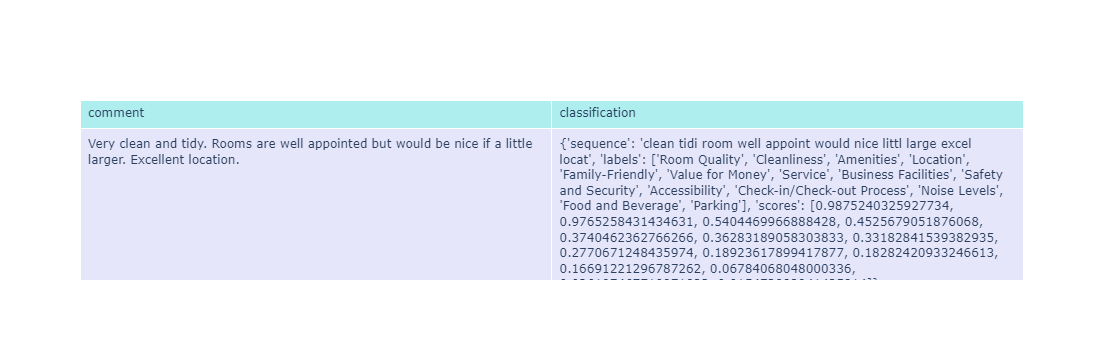

In [54]:
import plotly.graph_objects as go
file_path = '200class.csv'  # replace 'your_file.csv' with the actual path to your CSV file
df = pd.read_csv(file_path)

# Specify the column names you want to display
column1 = 'comment'  # replace 'ColumnName1' with the actual name of the first column
column2 = 'classification'  # replace 'ColumnName2' with the actual name of the second column

selected_columns = df[[column1, column2]]

# Create a Plotly table
fig = go.Figure(data=[go.Table(
    header=dict(values=list(selected_columns.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[selected_columns[column1], selected_columns[column2]],
               fill_color='lavender',
               align='left'))
])

# Show the figure
fig.show()